In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler

In [3]:
path = "./files/Breast-Cancer-Wisconsin.csv"
df = pd.read_csv(path)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## valores nulos, duplicados, únicos y no únicos

In [6]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [38]:
df.duplicated().sum()

np.int64(0)

In [39]:
df.nunique()

diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: int64

## Eliminación de columnas que no afectan al análisis del dataset

In [7]:
df.drop(['Unnamed: 32', 'id'], axis=1, inplace=True)

In [51]:
df_processing = df.copy()

In [52]:
df_processing['diagnosis'] = df_processing['diagnosis'].map({'M': 1, 'B': 0})

In [53]:
df_processing.diagnosis = df_processing.diagnosis.astype("float64")

In [54]:
df_processing.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1.0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1.0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [55]:
df_processing.diagnosis.value_counts()

diagnosis
0.0    357
1.0    212
Name: count, dtype: int64

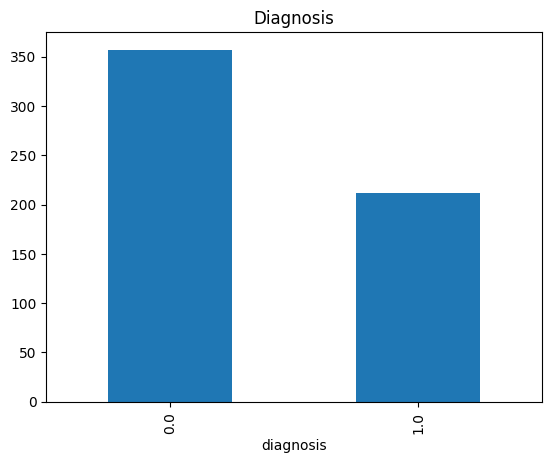

In [56]:
df_processing['diagnosis'].value_counts().plot(kind='bar')
plt.title("Diagnosis")
plt.show()

## Gráfica de correlación

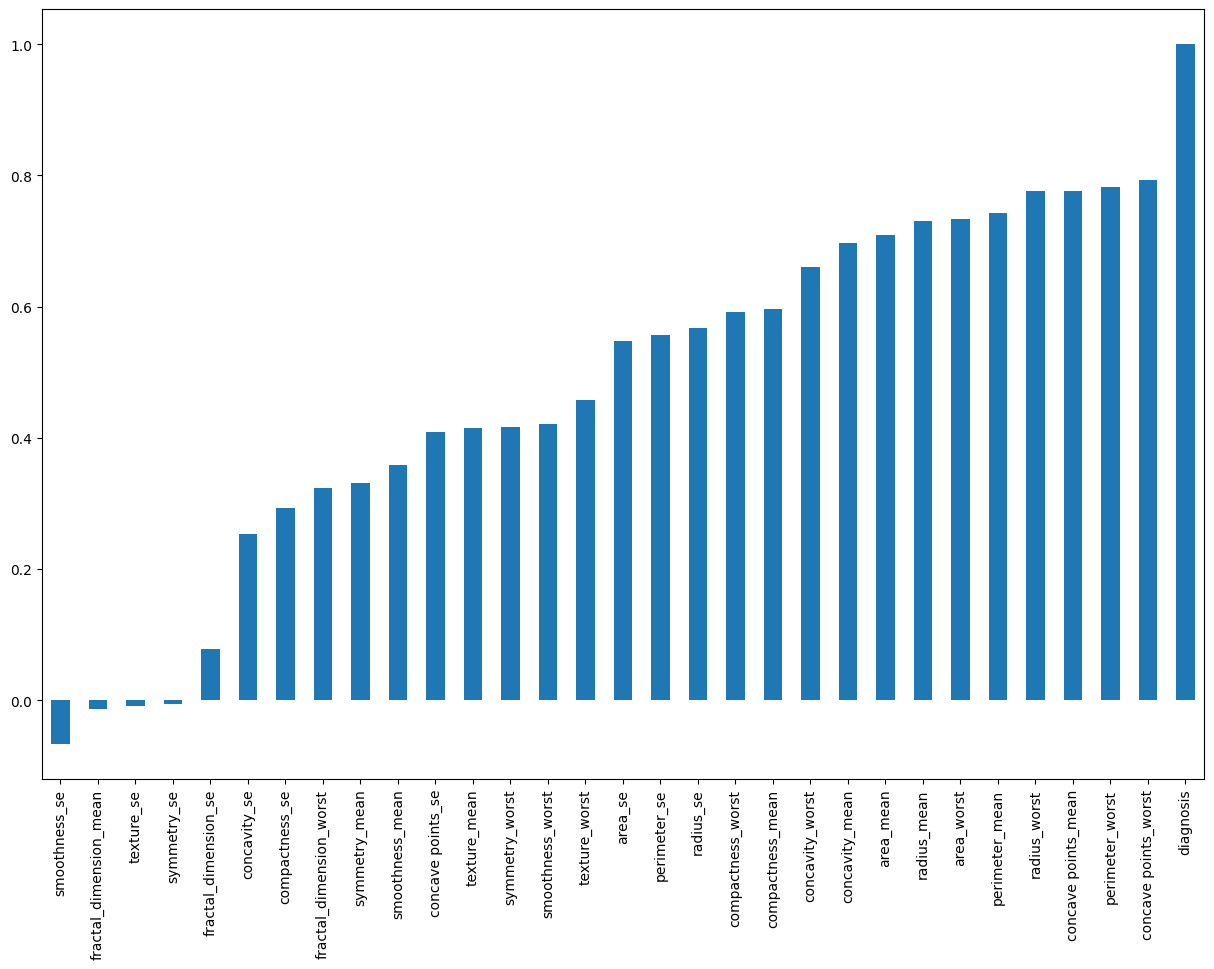

In [57]:
fig = plt.figure(figsize=(15, 10))
df_processing_corr = df_processing.corr()['diagnosis'].sort_values(ascending=True)
df_processing_corr.plot(kind='bar')
plt.show()

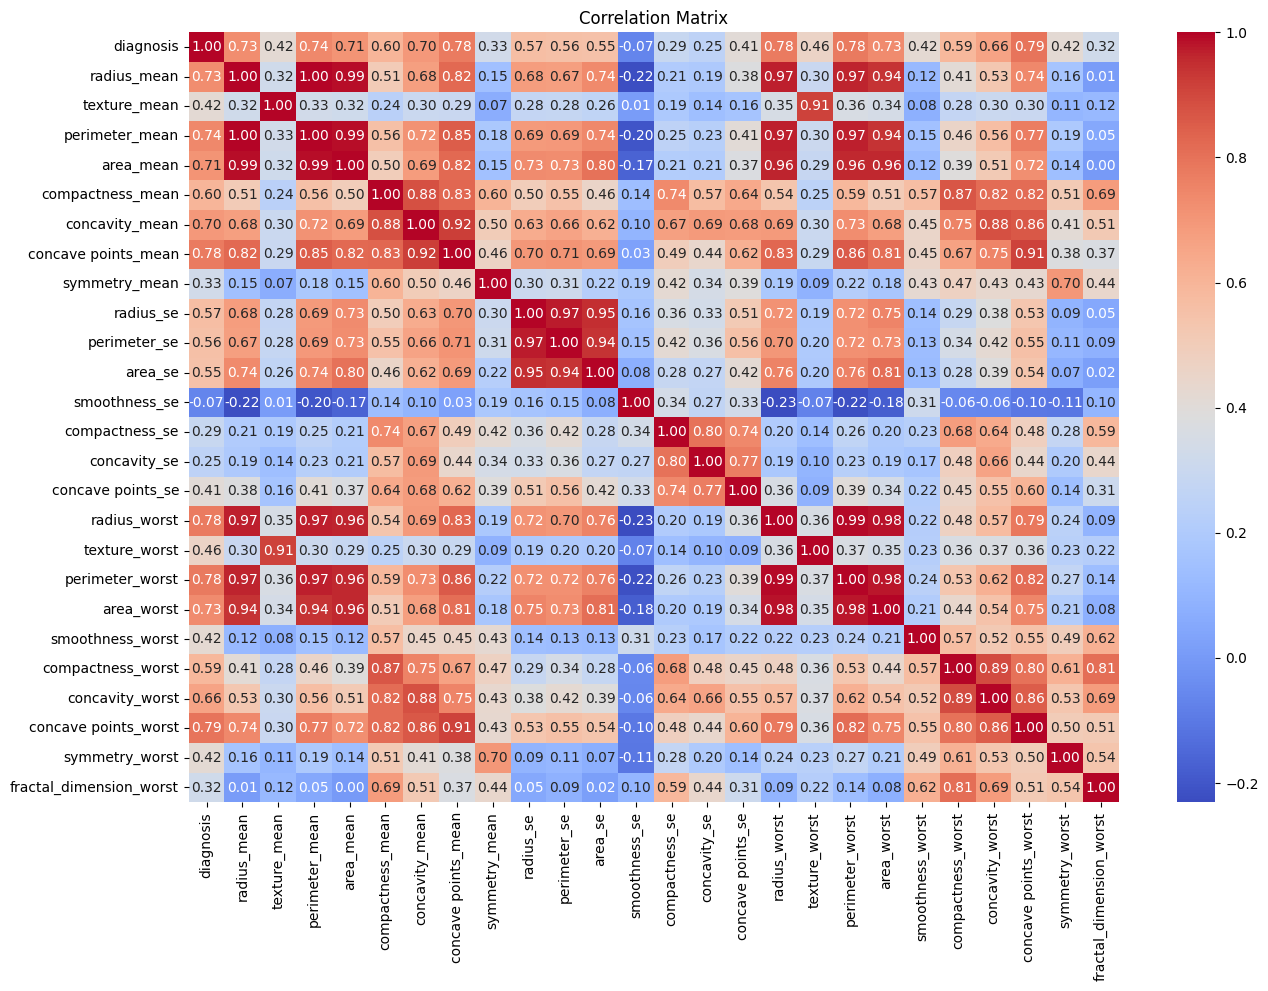

In [72]:
fig = plt.figure(figsize=(15, 10))
sns.heatmap(df_processing.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

## Eliminación de elementos que no tienen casi correlación con el target

In [58]:
df_processing.drop(["smoothness_mean", "fractal_dimension_mean", "texture_se", "symmetry_se", "fractal_dimension_se"], axis=1, inplace=True)

## Seleccionando la correlación mayor al 0.75

In [65]:
lim = 0.75
df_procession_corr_filtered = np.abs(df_processing.corr()['diagnosis'] > lim)
df_processing_corr_features = df_processing.corr().columns[df_procession_corr_filtered].tolist()

<Figure size 1500x1000 with 0 Axes>

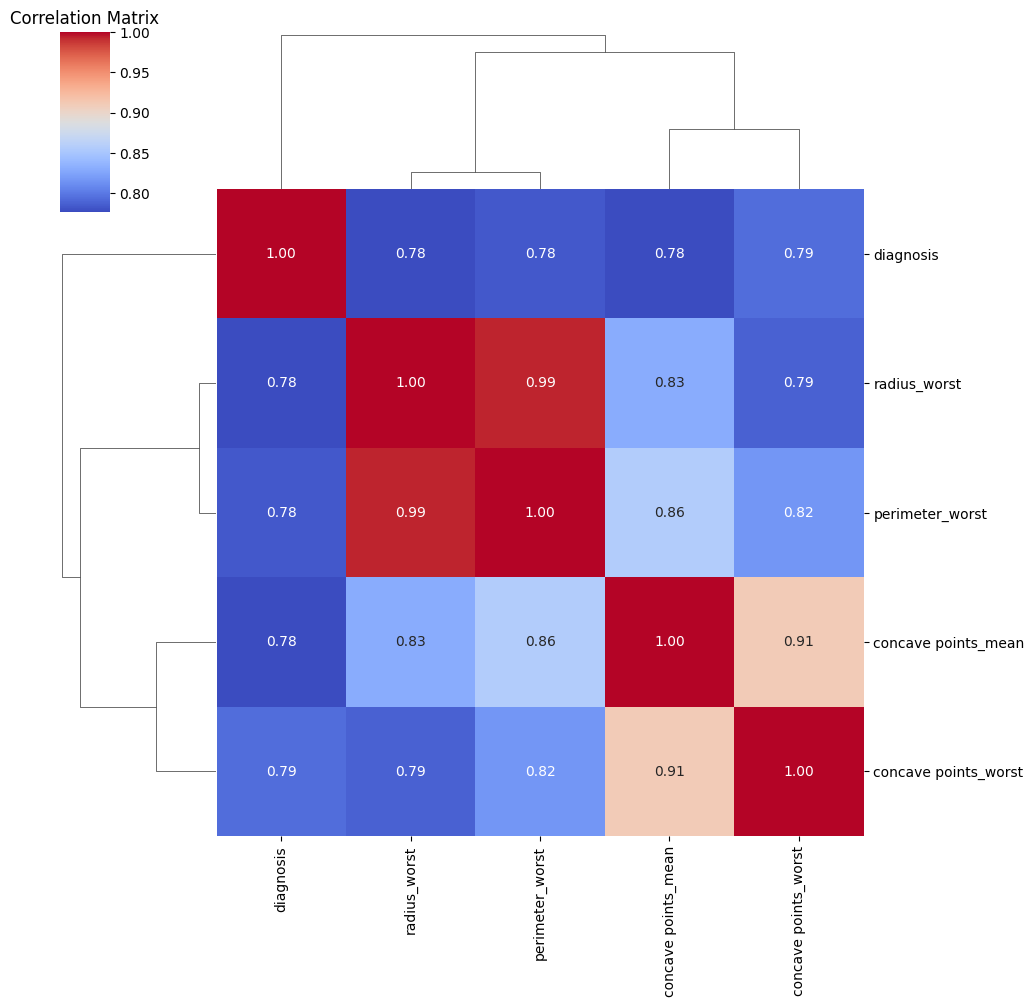

In [70]:
plt.figure(figsize=(15, 10))
sns.clustermap(df_processing[df_processing_corr_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

## Matriz de correlación

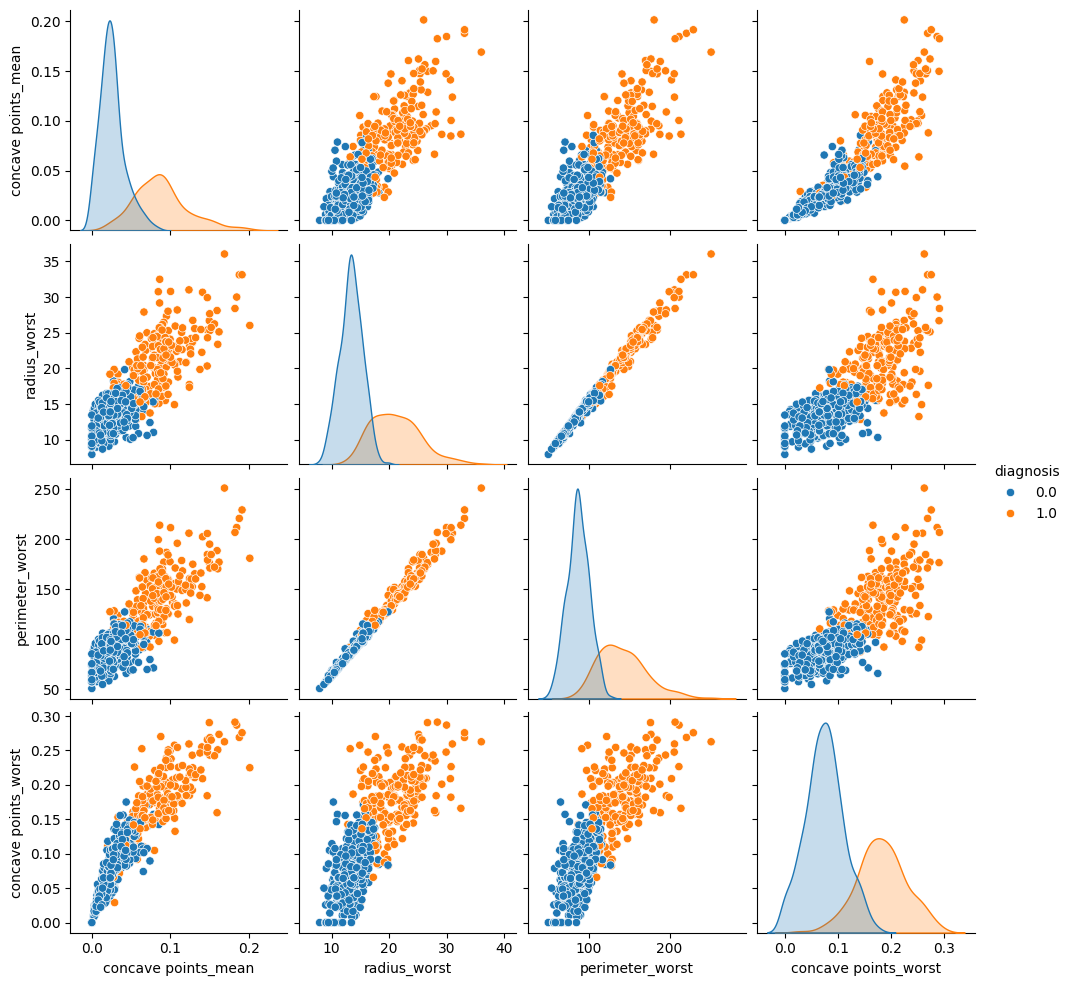

In [71]:
sns.pairplot(df_processing[df_processing_corr_features], hue='diagnosis')

## Escalando los valores

In [21]:
scaler = MinMaxScaler()
df_processing_scaled = pd.DataFrame(scaler.fit_transform(df_processing))

In [23]:
df_processing_scaled.columns = df_processing.columns

In [24]:
df_processing_scaled.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,1.0,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,1.0,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,1.0,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,1.0,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


## Entrenamiento del modelo

In [73]:
X = df_processing_scaled.drop('diagnosis', axis=1)
y = df_processing_scaled['diagnosis']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [75]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((398, 30), (171, 30), (398,), (171,))

In [76]:
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [77]:
pred_test = model.predict(X_test)

In [78]:
print(metrics.accuracy_score(y_test, pred_test))

0.9766081871345029


## Evaluación del modelo

In [80]:
model.predict_proba(X_test)

array([[8.14385096e-01, 1.85614904e-01],
       [3.78431047e-02, 9.62156895e-01],
       [1.72401210e-01, 8.27598790e-01],
       [9.35911047e-01, 6.40889527e-02],
       [9.75571995e-01, 2.44280052e-02],
       [1.01379251e-04, 9.99898621e-01],
       [9.20602212e-04, 9.99079398e-01],
       [2.95237699e-01, 7.04762301e-01],
       [5.03489052e-01, 4.96510948e-01],
       [9.56246094e-01, 4.37539065e-02],
       [8.74153765e-01, 1.25846235e-01],
       [2.64059568e-01, 7.35940432e-01],
       [9.13442144e-01, 8.65578555e-02],
       [3.24031912e-01, 6.75968088e-01],
       [9.52533954e-01, 4.74660462e-02],
       [2.30925685e-02, 9.76907432e-01],
       [9.39374200e-01, 6.06258003e-02],
       [9.91621402e-01, 8.37859827e-03],
       [9.98196904e-01, 1.80309559e-03],
       [6.56477012e-03, 9.93435230e-01],
       [7.22931901e-01, 2.77068099e-01],
       [9.17565732e-01, 8.24342683e-02],
       [6.35301874e-04, 9.99364698e-01],
       [9.90629994e-01, 9.37000562e-03],
       [9.602291

In [81]:
model.coef_

array([[ 1.63784288,  1.45682988,  1.60445883,  1.41214738,  0.62886823,
         0.32899986,  1.34265983,  2.05316985,  0.41964751, -0.86310186,
         1.14352897,  0.05914658,  0.85868835,  0.75297216,  0.02363431,
        -0.50665648, -0.18726406,  0.29640596, -0.23104048, -0.59130628,
         2.07063202,  2.07808406,  1.87285951,  1.49977756,  1.31157835,
         0.77612591,  1.39605898,  2.44735339,  1.31115545,  0.22375793]])

<Figure size 1000x700 with 0 Axes>

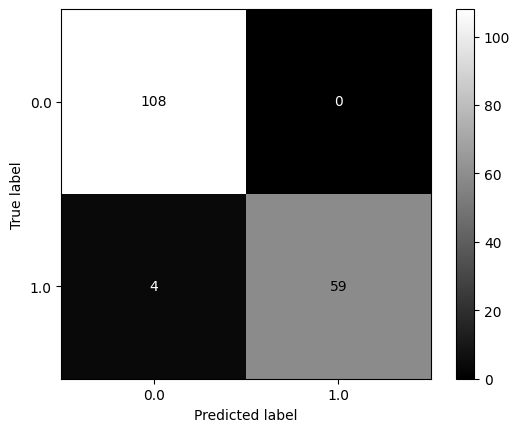

In [82]:
fig = plt.figure(figsize=(10, 7))
cm = confusion_matrix(y_test, pred_test, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='gray')